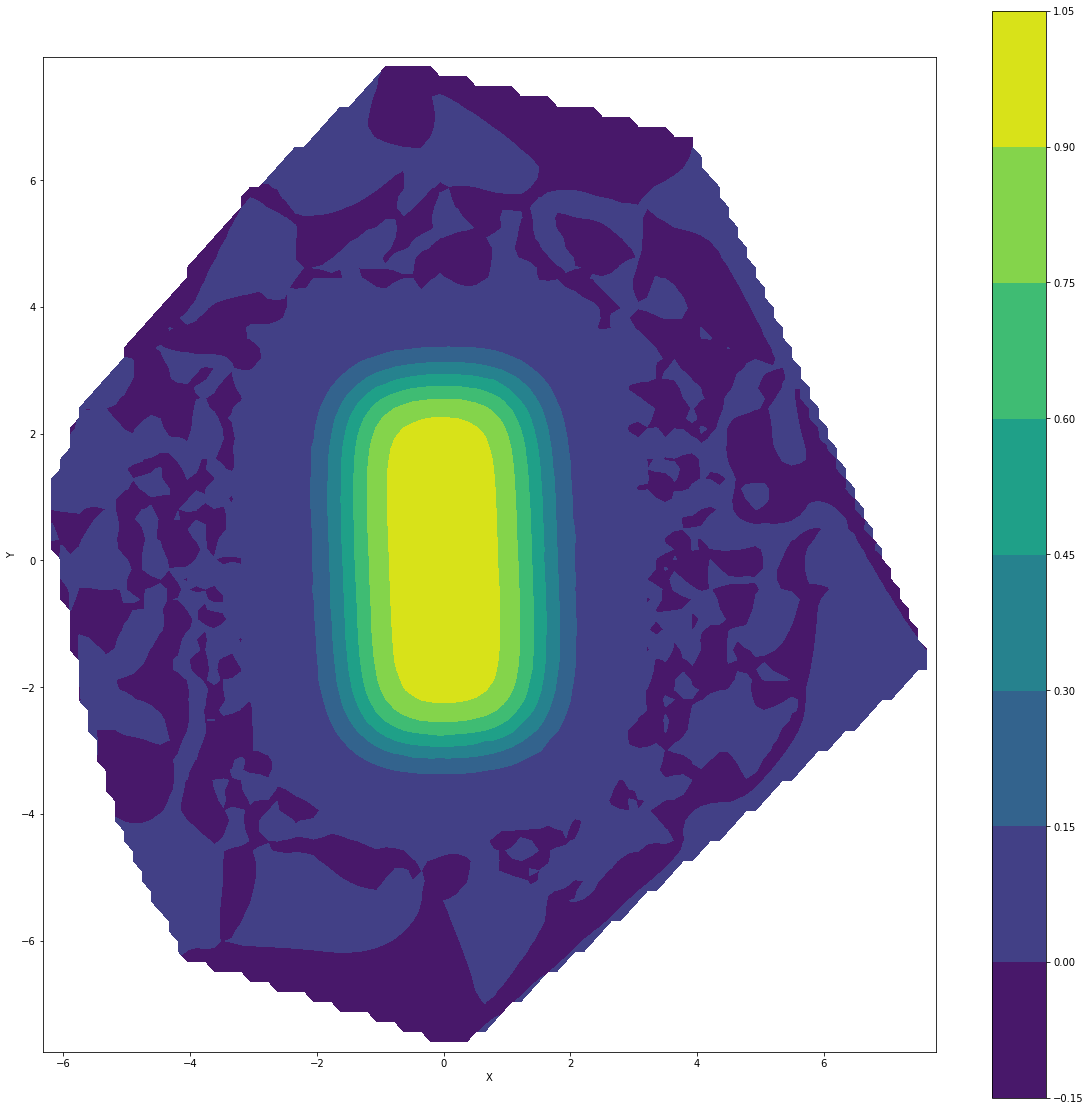

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

def plot_contour(x, y, z):
    """
    Create a contour plot of a 2D vector field.
    
    Parameters:
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        z (array-like): The magnitudes of the vector field at each point.
    """
    # Define the grid over which to interpolate the data
    xi = np.linspace(min(x), max(x), 100)
    yi = np.linspace(min(y), max(y), 100)
    XI, YI = np.meshgrid(xi, yi)

    # Interpolate the data onto the grid
    zi = griddata((x, y), z, (XI, YI), method='cubic')

    # Create a contour plot of the interpolated data
    fig, ax = plt.subplots(figsize=(20,20))
    c = ax.contourf(XI, YI, zi)

    # Add a colorbar to the plot
    cbar = fig.colorbar(c)

    # Set the axis labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect(1)
    
def get_data_for_specific_var_and_pos(data, var_idx, pos_idx):
    return data[(data[:,3] == var_idx) & (data[:,4] == pos_idx)][:,:3].T
def get_data_for_specific_var(data, var_idx):
    return data[(data[:,3] == var_idx)][:,:3].T

data = np.load("./workspace/data/0.npy")
variances = np.load("./workspace/data/variances.npy")
poses = np.load("./workspace/data/poses.npy")

var_idx = 0
pos_idx = 0
x, y, z = get_data_for_specific_var_and_pos(data, var_idx, pos_idx)
# print(data)
# print(variances[var_idx])
# print(poses[var_idx])
# z = np.array([])
# pos_idx = 1
# while len(z) == 0:
#     x, y, z = get_data_for_specific_var_and_pos(data, 0, pos_idx)
#     pos_idx += 1
#     if pos_idx % 100 == 0:
#         print(pos_idx)
    
# print(min(z), max(z))
plot_contour(x, y, z)
